Number of data points in each cluster:
{2: 444, 4: 239}

Evaluation Metrics:
Accuracy: 100.0 %
Confusion Matrix:
[[444   0]
 [  0 239]]


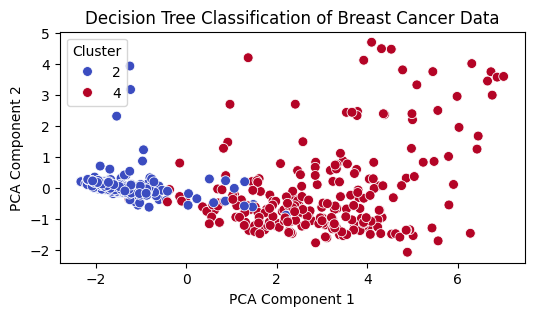

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cell_df = pd.read_csv('/content/sample_data/cell_samples.csv')

# Data cleaning: Drop rows with missing values in 'BareNuc'
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)

# Feature selection
X = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y = cell_df['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Applying Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_scaled, y)
y_pred = clf.predict(X_scaled)

# Evaluation Metrics
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

# Print the required output
print("Number of data points in each cluster:")
unique, counts = np.unique(y_pred, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print(cluster_counts)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy * 100, "%")

print("Confusion Matrix:")
print(conf_matrix)

# Visualize the decision boundary and the clusters
plt.figure(figsize=(6, 3))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred, palette='coolwarm', s=50)
plt.title('Decision Tree Classification of Breast Cancer Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

Evaluation Metrics:
Accuracy: 93.43065693430657 %
Confusion Matrix:
[[77  2]
 [ 7 51]]

Classification Report:
              precision    recall  f1-score   support

           2       0.92      0.97      0.94        79
           4       0.96      0.88      0.92        58

    accuracy                           0.93       137
   macro avg       0.94      0.93      0.93       137
weighted avg       0.94      0.93      0.93       137



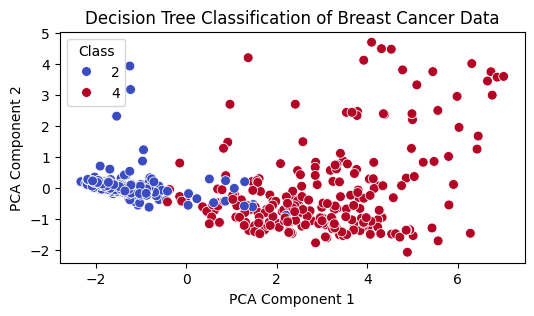

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cell_df = pd.read_csv('/content/sample_data/cell_samples.csv')

# Data cleaning: Drop rows with missing values in 'BareNuc'
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)

# Feature selection
X = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y = cell_df['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Applying Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the required output
print("Evaluation Metrics:")
print("Accuracy:", accuracy * 100, "%")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the decision boundary and the clusters
plt.figure(figsize=(6, 3))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', s=50)
plt.title('Decision Tree Classification of Breast Cancer Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Class')
plt.show()


Evaluation Metrics:
Accuracy: 93.43065693430657 %
Confusion Matrix:
[[77  2]
 [ 7 51]]

Classification Report:
              precision    recall  f1-score   support

           2       0.92      0.97      0.94        79
           4       0.96      0.88      0.92        58

    accuracy                           0.93       137
   macro avg       0.94      0.93      0.93       137
weighted avg       0.94      0.93      0.93       137



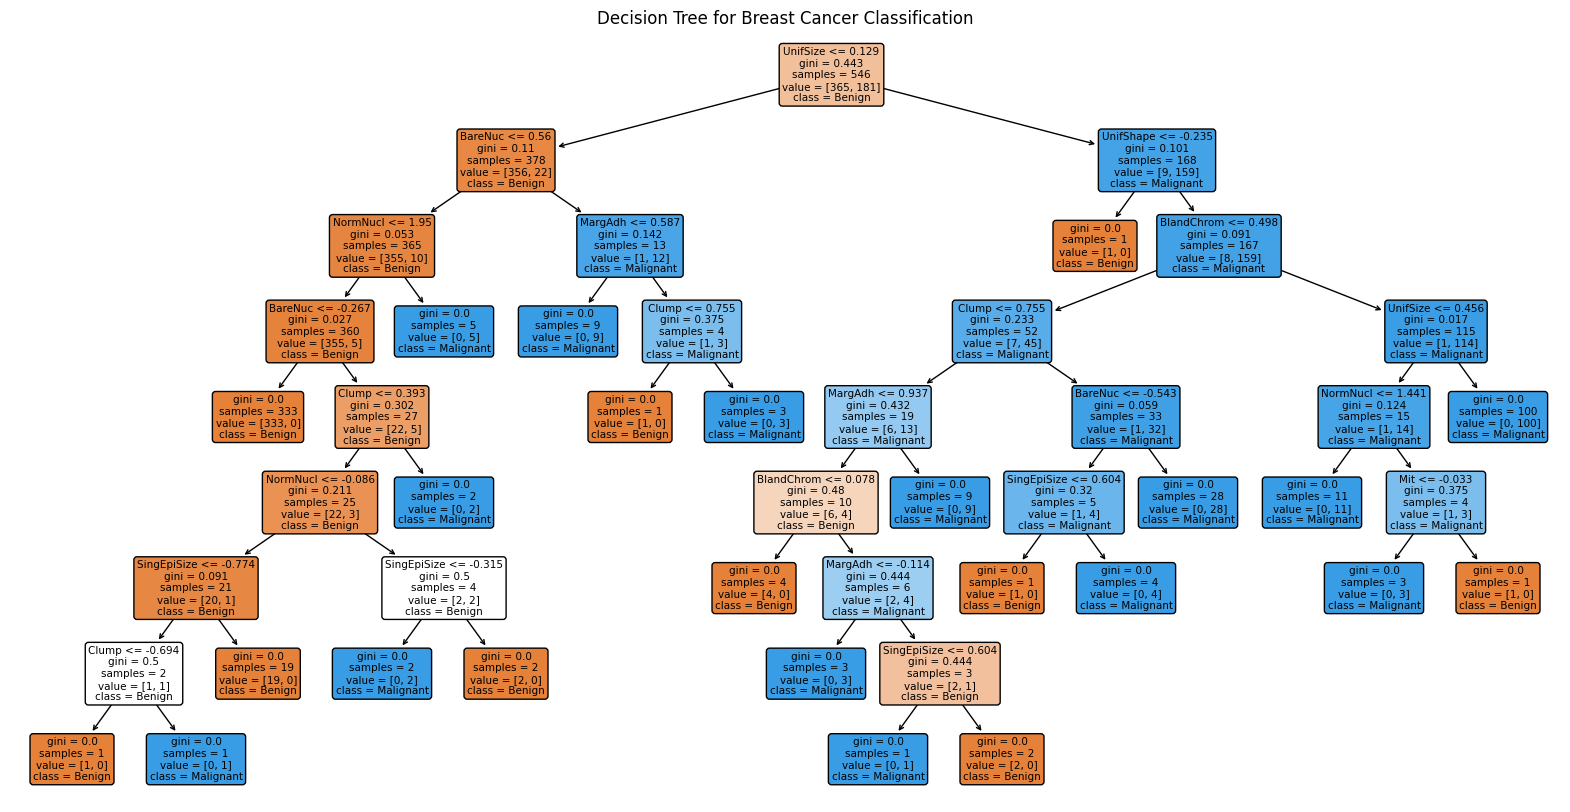

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
cell_df = pd.read_csv('/content/sample_data/cell_samples.csv')

# Data cleaning: Drop rows with missing values in 'BareNuc'
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)

# Feature selection
X = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y = cell_df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Evaluation Metrics:")
print("Accuracy:", accuracy * 100, "%")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'], rounded=True)
plt.title("Decision Tree for Breast Cancer Classification")
plt.show()


Number of data points in each cluster:
{2: 444, 4: 239}

Evaluation Metrics:
Accuracy: 100.0 %
Confusion Matrix:
[[444   0]
 [  0 239]]


<ipython-input-3-6472df13ca9c>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='viridis')


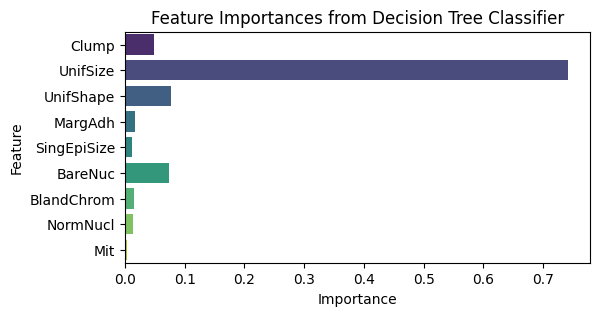

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pydotplus
from IPython.display import Image

# Load the dataset
cell_df = pd.read_csv('/content/sample_data/cell_samples.csv')

# Data cleaning: Drop rows with missing values in 'BareNuc'
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)

# Feature selection
X = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y = cell_df['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_scaled, y)
y_pred = clf.predict(X_scaled)

# Evaluation Metrics
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

# Print the required output
print("Number of data points in each cluster:")
unique, counts = np.unique(y_pred, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print(cluster_counts)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy * 100, "%")

print("Confusion Matrix:")
print(conf_matrix)

# Visualize the decision tree structure
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['2', '4'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Plot feature importances
feature_importances = clf.feature_importances_
features = X.columns

plt.figure(figsize=(6, 3))
sns.barplot(x=feature_importances, y=features, palette='viridis')
plt.title('Feature Importances from Decision Tree Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()